In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay

def binary_cross_entropy_loss(Y_true, Y_pred):
    loss=0
    for i in range(len(Y_true)):
        loss+=Y_true[i]*np.log(Y_pred[i])+(1-Y_true[i])*np.log(1-Y_pred[i])
    
    return -loss/len(Y_true)

def sigmoid(z):
    for i in range(len(z)):
        z[i]=(1/(1+np.exp(-z[i])))
    return z

def normalize_features(df):
    max_values=[0,0]
    for i in range(len(df)):
        if(df["Age"][i]>max_values[0]):
            max_values[0]=df["Age"][i]
        if(df["EstimatedSalary"][i]>max_values[1]):
            max_values[1]=df["EstimatedSalary"][i]
    
    for i in range(len(df)):
        df["Age"][i]/=max_values[0]
        df["EstimatedSalary"][i]/=max_values[1]

    return df

def fit_logistic_regression(X, y, learning_rate, num_epochs):
    weights=[np.random.rand() for i in range(3)]
    bias=np.random.rand()
    #Epochs
    for epoch in range(num_epochs):
        #Forward Pass
        y_pred=sigmoid(np.dot(weights,X.T)+bias)

        #Loss
        loss=binary_cross_entropy_loss(Y_pred=y_pred,Y_true=y)

        #backprop
        error=[]
        for i in range(len(y_pred)):
            error.append(((y_pred[i]-y[i])/y_pred[i]*(1-y_pred[i]))*(y_pred[i])*(1-y_pred[i]))
        
        weights-=learning_rate*np.dot(X.T,np.array(error))/len(y_pred)
        bias-=learning_rate*np.dot(np.ones(len(y_pred)),error)/len(y_pred)

    return weights,bias

def predict(X, weights, bias, threshold=0.5):
    pred=np.dot(weights,X.T)+bias
    '''for i in range(len(pred)):
        if(pred[i]>threshold):
            pred[i]=1
        else:
            pred[i]=0'''
    return np.where((pred > threshold), 1, 0) #np.asarray(pred).astype(int)

def evaluate_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true,y_pred)
    print("Accuracy: ",accuracy)
    precision=precision_score(y_true=y_true,y_pred=y_pred)
    print("Precision: ",precision)
    recall=recall_score(y_true=y_true,y_pred=y_pred)
    print("Recall Score: ",recall)
    f1=f1_score(y_true=y_true,y_pred=y_pred)
    print("F1-Score: ",f1)
    return

def plot_roc_curve(Y_true, Y_scores):
    fpr, tpr, thresholds = roc_curve(y_score=Y_scores, y_true=Y_true)
    roc_auc = auc(fpr, tpr)

    #Plotting the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    pass

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    return


Accuracy:  0.68
Precision:  0.717391304347826
Recall Score:  0.9166666666666666
F1-Score:  0.8048780487804879


C:\Users\anshu_r9i5971\AppData\Local\Temp\ipykernel_5808\2046675490.py:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Age"][i]/=max_values[0]
C:\Users\anshu_r9i5971\AppData\Local\Temp\ipykernel_5808\2046675490.py:27: SettingWithCopyWa

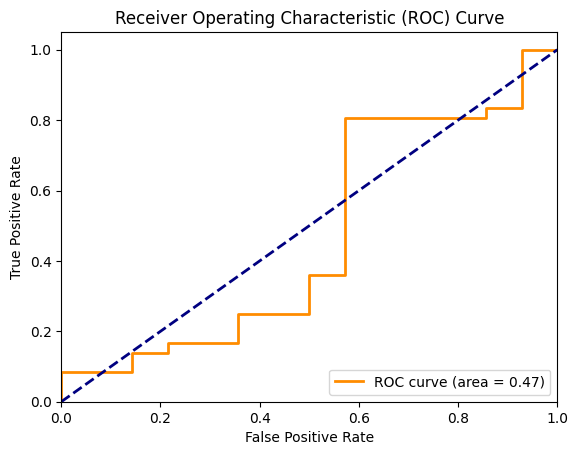

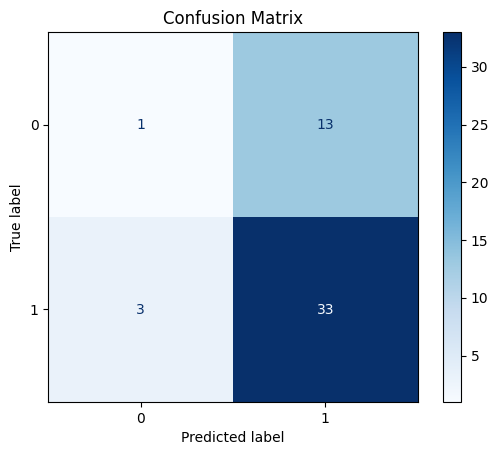

In [2]:
def main():
    data_train = pd.read_csv("train.csv")
    data_test = pd.read_csv("test.csv")

    data_train.loc[data_train["Gender"]=="Male","Gender"]=0
    data_train.loc[data_train["Gender"]=="Female","Gender"]=1
    
    data_test.loc[data_test["Gender"]=="Male","Gender"]=0
    data_test.loc[data_test["Gender"]=="Female","Gender"]=1

    # Normalize the features and handle categorical data
    data_train = normalize_features(data_train)
    data_test = normalize_features(data_test)
    
    # Extract features and labels
    X_train = data_train[['Gender', 'Age', 'EstimatedSalary']].values
    y_train = data_train['Purchased'].values
    X_test = data_test[['Gender', 'Age', 'EstimatedSalary']].values
    y_test = data_test['Purchased'].values

    # Train logistic regression model
    learning_rate =0.1
    num_epochs = 10
    weights, bias = fit_logistic_regression(X_train, y_train, learning_rate, num_epochs)

    # Make predictions on the test set
    y_pred_test = predict(X_test, weights, bias)
    
    # Calculate and print evaluation metrics
    evaluate_metrics(y_test, y_pred_test)
    
    # Generate and plot ROC curve
    y_scores = sigmoid(np.dot(X_test, weights) + bias)  # Calculate probabilities for ROC
    plot_roc_curve(y_test, y_scores)
    
    # Generate and plot confusion matrix
    plot_confusion_matrix(y_test, y_pred_test)


# Run the main function
if __name__ == "__main__":
    main()
    